# Task 1: Data Engineering 

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class ETL:
    def __init__(self):
        pass
       
    def load_data(self,path):
        if type(path) == str:
            ext = path.split('.')[-1]
            
            #loading csv data
            if ext == 'csv':
                print('Loading the csv type file!')
                try:
                    data = pd.read_csv(path, index_col=[0])
                    return data
                except Exception as e:
                    return e
                
            elif ext == 'xlsx':
                print('Loading the excel type file!')
                try:
                    data = pd.read_excel(path,index_col=[0])
                    return data
                except Exception as e:
                    return e 
            else:
                return '''Error : Please check the file extension!'''
        else:
            return '''Error : The path must be string!.'''

    def str_to_date_(self,string):
        string = string.split(' ')[0]
        for fmt in ["%Y-%m-%d","%Y/%m/%d", "%d-%m-%Y", "%Y%m%d","%Y.%m.%d","%d/%m/%Y","%d.%m.%Y"]:
            try:
                return datetime.datetime.strptime(string, fmt).date()
            except ValueError as e:
                continue
        if ValueError(string):
            return np.nan
        
        
    def cleanData(self,path):
        data = self.load_data(path)
        if 'production_date' in data.columns:
            data['production_date'] = data['production_date'].apply(lambda x : self.str_to_date_(str(x)))
        
        if 'country' in data.columns:
            data['country'] = data['country'].apply(lambda x : str(x).lower())
            data['country'] = data['country'].apply(lambda x : str(x).replace('.',''))
            data['country'] = data['country'].apply(lambda x : str(x).replace('/ ',''))
            data['country'] = data['country'].apply(lambda x : str(x).replace('/',' '))
            data['country'] = data['country'].apply(lambda x : str(x).strip())
        return data
    
    def assembleData(self,list_of_col):
        data = pd.DataFrame(
                                {
                                     'fin' : list_of_col[0], 'production_date' : list_of_col[1] ,
                                     'country' : list_of_col[2], 'sales_code_array' : list_of_col[3]
                                }
                            )

        return data
    
    def getData(self,path1, path2):
        
        data1 = self.cleanData(path1)
        data2 = self.cleanData(path2)
        list_of_col = [
                        data2['fin'].values, 
                        data1['production_date'].values, 
                        data1['country'].values,
                        data1['sales_code_array'].values
                      ] 
        
        req_data = self.assembleData(list_of_col)
        col = ['fin','production_date','country','sales_code_array']

        if  col[0] == req_data.columns[0] and \
            col[1] == req_data.columns[1] and \
            col[2] == req_data.columns[2] and \
            col[3] == req_data.columns[3]:
            
            req_data['country'] = np.where(req_data['country']=='nan', np.nan,req_data['country'])
            req_data['production_date'] = np.where(req_data['production_date']=='nan', np.nan,req_data['production_date'])
            req_data['production_date'] = np.where(req_data['production_date']=='nan', np.nan,req_data['production_date'])
            req_data.dropna(inplace=True)
            index_names = req_data[(req_data['production_date'].apply(lambda x : x.year) > 2021) & \
                            (req_data['production_date'].apply(lambda x : type(x)!=float))].index
            req_data.drop(index_names, inplace = True)
            index_names = req_data[(req_data['production_date'].apply(lambda x : x.year) < 1850) & \
                            (req_data['production_date'].apply(lambda x : type(x)!=float))].index
            req_data.drop(index_names, inplace = True)
            return req_data
        else:
            print(
                "please check the list of columns,\
                the columns should be in the order \
                ['fin','production_date','production_date',\
                'sales_code_array']"
                 )
            
    def saveData(self,data,path,format_=None):
        form = path.split('.')[-1]
        if format_ or form in ['csv','xlsx','json']:
            if format_ == 'csv' or form == 'csv':
                data.to_csv(path,index=False)
            elif format_ == 'xlsx' or form == 'xlsx':
                data.to_excel(path,index=False) 
            elif format_ == 'json' or form == 'json' :
                data.to_json(path)
        else:
            print('No saving format was mentioned, so saving the file as csv file.')
            path = path + '.csv'
            data.to_csv(path,index=False)
        
        

# Data Science (EDA)

In [3]:
class EDA:
    def __init__(self,processed_data):
        self.data = processed_data
        
    def str_to_date(self,string):
        for fmt in ["%Y-%m-%d","%Y/%m/%d", "%d-%m-%Y", "%Y%m%d","%Y.%m.%d","%d/%m/%Y","%d.%m.%Y"]:
            try:
                return datetime.datetime.strptime(string, fmt).date()
            except ValueError as e:
                continue
        raise ValueError(string)

    def visualize(self,
                  x,y,
                  title='Top 3 buying countries', 
                  x_label = 'Countries', 
                  y_label = 'Sales', 
                  fig_size = (6,5)
                 ):
        plt.figure(figsize = fig_size)
        plt.title(title)
        plt.grid(True)
        plt.bar(x,y)
        plt.xlabel(x_label,fontsize=15)
        plt.ylabel(y_label,fontsize=15)
        plt.show()

    def top_buying_countries(self,
                             start_date,
                             end_date,
                             top_n = 3
                            ):
        s_d = self.str_to_date(start_date)
        e_d = self.str_to_date(end_date)

        per1 = pd.date_range(start =s_d, 
                 end =e_d)
        countries = {} 
        for i,val in enumerate(req_data.production_date):
            if val > s_d and val < e_d:
                if req_data['country'].iloc[i]:
                    if req_data['country'].iloc[i] not in countries:
                        countries[req_data['country'].iloc[i]] = 1
                    else:
                        countries[req_data['country'].iloc[i]] += 1
                else:
                    continue
                    
        countries = dict(sorted(countries.items(), reverse=True,key=lambda x:x[1]))
        n_top = {}
        for i,j in enumerate(countries.items()):
            if i < top_n:
                n_top[j[0]] = j[1]           
            if i == 0:
                print(f'The best buying country is {j[0]} and total truck sold to {j[0]} was {j[1]}')
        self.visualize(n_top.keys(), n_top.values())
        return 
    
    def best_selling_year(self):
        data_c = self.data.copy()
        data_c['year'] = data_c['production_date'].apply(lambda x : x.year)
        sale_on_yr = {}
        for i,a in enumerate(data_c.groupby(['year']).count()['fin'].items()):
            sale_on_yr[a[0]] = a[1]
        sale_on_yr = dict(sorted(sale_on_yr.items(), reverse=True,key=lambda x:x[1]))
        for i,j in enumerate(sale_on_yr.items()):
            if i == 0:
                print(f'The best selling year is {j[0]} and total truck sold was {j[1]}')
        x = [str(i) for i in sale_on_yr.keys()]
        self.visualize(x,sale_on_yr.values(),'Sales over the years','Years','sales(number os trucks)', (10,5))
        return 
    
    def get_fin_for_first_truch_sold(self):
        s = self.data['fin'][self.data['production_date'] == self.data['production_date'].min()]
        print(f'The FIN for the first truck sold is {s.values[0]}')
        return 
    
    def vehicle_sold_with_certain_engines(self,
                                      engine_data,
                                      d1 = '01/01/2017',
                                      d2 = '01/01/2021',
                                      engine_list = ['OM934', 'OM936', 'OM470','OM471'],
                                      q5 = False,
                                      country = 'New Zealand'
                                     ):
        d1 = self.str_to_date(d1)
        d2 = self.str_to_date(d2)
        country = country.lower()
        dummy_data = self.data[(self.data['production_date'] > d1) & (self.data['production_date'] < d2)]
        if q5 :
            dummy_data = dummy_data[dummy_data['production_date'] == country]
        c= 0
        d = []
        
        for i,engine in enumerate(engine_data['Code Description En'].apply(lambda x : ''.join(x.split(' '))).values):
            if engine in engine_list:
                en = engine_data.iloc[i].values[3]
                for j,rec in enumerate(dummy_data.values):
                    sales_code_list = rec[-1].split(', ')
                    if en in sales_code_list:
                        c +=1
                        if q5:
                            d.append(dummy_data.iloc[0])
        if q5:
            return d
        else:
            print(f'Total number of trucks sold between {d1} and {d2} is {c}.')
            return
    
    def get_fin_with_contry_and_date_range(  self,
                                             engine_data,
                                             country = 'New Zealand', 
                                             engine_list = ['OM936'],
                                             d1 = '01/01/2017',
                                             d2 = '01/01/2021'
                                          ):
        d = self.vehicle_sold_with_certain_engines( engine_data,
                                                    d1, d2,
                                                    engine_list,
                                                    True, 'New Zealand'
                                                    )
        if len(d)>0:
            return d
        else:
            return f'''There is no data for the country {country}.'''

# Task 1 :  Answers

In [4]:
#Initializations
path1 = 'vehicle_data.xlsx'
path2 = 'vehicle_hash.xlsx'

#Class instance creation
etl = ETL()

#1.1 : Load the Data
vehicle_data = etl.load_data(path1) #Loading raw vehicle data
vehicle_hash = etl.load_data(path2) #Loading raw vehicle hash data

#1.2 : Adding , Cleaning and preparing the data
req_data = etl.getData(path1,path2) #Loading preprocessed data

#1.3 Saving the data
etl.saveData(req_data,'req_data.json')

Loading the excel type file!
Loading the excel type file!
Loading the excel type file!
Loading the excel type file!


In [5]:
#vehicle_hash.head(3)

In [6]:
#vehicle_data.head(3)

In [7]:
#req_data.head(3)

# Task 2 : Answers

Loading the excel type file!
Q2.1====================================================================================================
The best buying country is germany and total truck sold to germany was 95


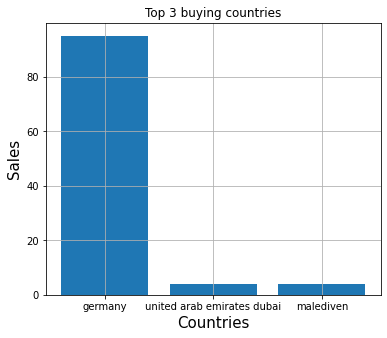

Q2.2====================================================================================================
The best selling year is 2011 and total truck sold was 64


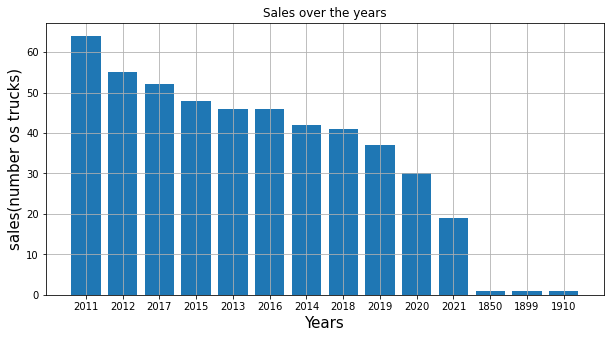

Q2.3====================================================================================================
The FIN for the first truck sold is WEB91332184832372
Q2.4====================================================================================================
Total number of trucks sold between 2017-01-01 and 2021-01-01 is 108.
Q2.5====================================================================================================
There is no data for the country New Zealand.


In [8]:
#Class initialization
eda = EDA(req_data)

#Loading the engine dataset.
engines = etl.load_data('engines.xlsx')
print('Q2.1'+'='*100)

#2.1 : Getting and plotting top trucks buying countries between '05.12.2012','12.11.2020'
eda.top_buying_countries('05.12.2012','12.11.2020')

print('Q2.2'+'='*100)
#2.2 : Getting the best year in which maximum number of trucks sold. Plotting the sales of truck year over year.
eda.best_selling_year()

print('Q2.3'+'='*100)
#2.3 : Getting the FIN for the first truck sold.(May be English translation for this question is not right.)
eda.get_fin_for_first_truch_sold()

print('Q2.4'+'='*100)
#2.4 : Number of Vehicle sold with certain engines and within certain date range.
eda.vehicle_sold_with_certain_engines(engines)

print('Q2.5'+'='*100)
#2.5 : Number of Vehicle sold with certain engines , within certain date range and to certain country here New Zealand.
print(eda.get_fin_with_contry_and_date_range(engines))

print('='*100)